In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('jobwise pay.xlsx')
data.head()

,job,avg_base_pay,avg_hourly_pay,tip_per_hr,Column1,Column2,Column3
0,"Asst. Manager, Fast Food",824.076,33.296,1.33184,9.9,0.4,4
1,Asst. Restaurant Manager,932.288,133.184,15.98208,11.2,1.6,12
2,Banquet Captain,1015.528,724.188,304.15896,12.2,8.7,42
3,Bar Manager,865.696,457.820,155.65880,10.4,5.5,34
4,Barista,724.188,99.888,11.98656,8.7,1.2,12


## Data preprocessing

In [3]:
## As Column1, Column2 and Column3 are only usd converted into inr, we will be dropping them.
data = data.drop(['Column1', 'Column2', 'Column3'], axis = 1)
data.head()

,job,avg_base_pay,avg_hourly_pay,tip_per_hr
0,"Asst. Manager, Fast Food",824.076,33.296,1.33184
1,Asst. Restaurant Manager,932.288,133.184,15.98208
2,Banquet Captain,1015.528,724.188,304.15896
3,Bar Manager,865.696,457.820,155.65880
4,Barista,724.188,99.888,11.98656


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job             18 non-null     object 
 1   avg_base_pay    18 non-null     float64
 2   avg_hourly_pay  18 non-null     float64
 3   tip_per_hr      18 non-null     float64
dtypes: float64(3), object(1)
memory usage: 708.0+ bytes


In [5]:
data.describe()

,avg_base_pay,avg_hourly_pay,tip_per_hr
count,18.000000,18.000000,18.000000
mean,789.855111,241.858444,102.436069
std,188.001659,284.373276,165.700612
min,416.200000,24.972000,0.998880
25%,661.758000,45.782000,1.872900
50%,757.484000,87.402000,8.656960
75%,915.640000,395.390000,129.230100
max,1140.388000,799.104000,471.471360


## Data visualization

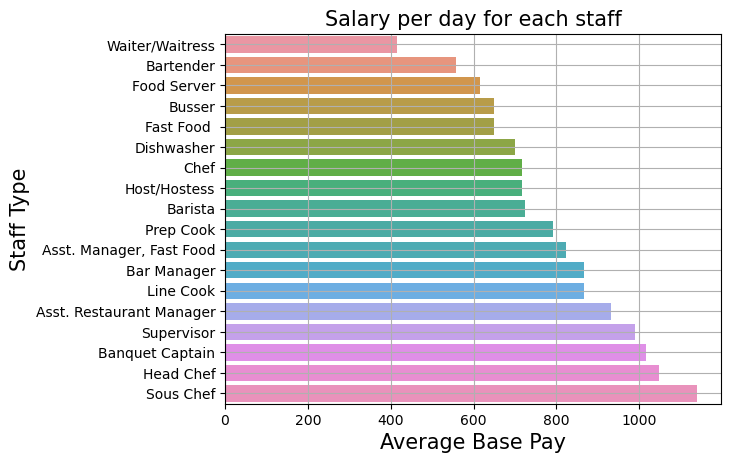

In [6]:
df1 = data.sort_values(by='avg_base_pay')

sns.barplot(y = df1['job'], x = df1['avg_base_pay'])
plt.ylabel('Staff Type', fontsize = 15)
plt.xlabel('Average Base Pay', fontsize = 15)
plt.title('Salary per day for each staff', fontsize = 15)

plt.grid(True)
plt.show()

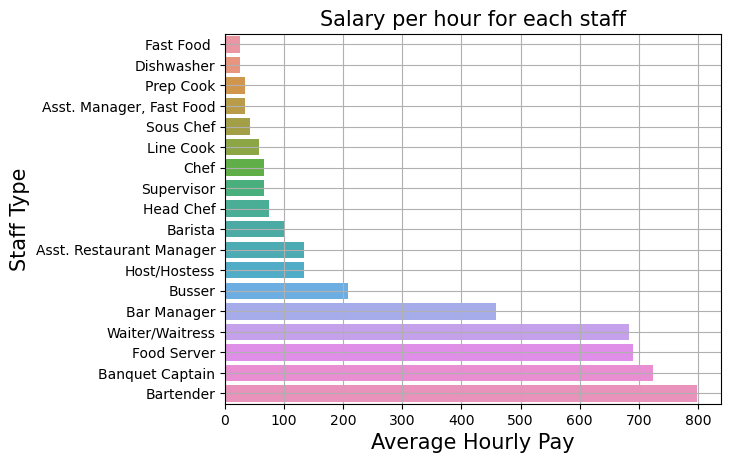

In [7]:
df2 = data.sort_values(by='avg_hourly_pay')

sns.barplot(y = df2['job'], x = df2['avg_hourly_pay'])
plt.ylabel('Staff Type', fontsize = 15)
plt.xlabel('Average Hourly Pay', fontsize = 15)
plt.title('Salary per hour for each staff', fontsize = 15)

plt.grid(True)
plt.show()

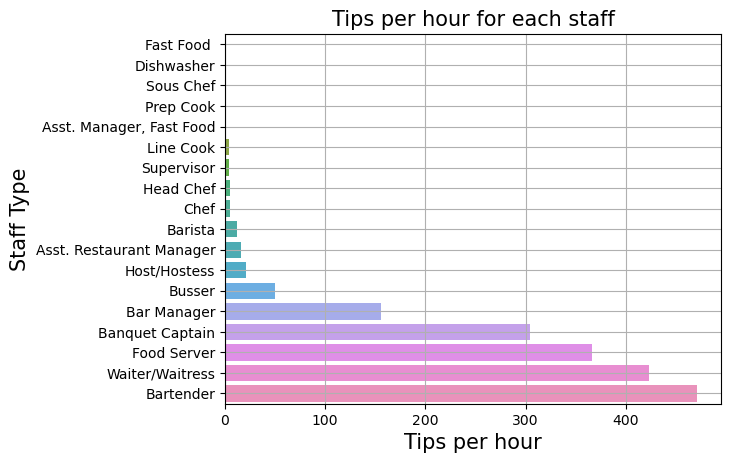

In [8]:
df3 = data.sort_values(by='tip_per_hr')

sns.barplot(y = df3['job'], x = df3['tip_per_hr'])
plt.ylabel('Staff Type', fontsize = 15)
plt.xlabel('Tips per hour', fontsize = 15)
plt.title('Tips per hour for each staff', fontsize = 15)

plt.grid(True)
plt.show()

**Encoding staff type for better computation**

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = data.copy()
data['job'] = le.fit_transform(data['job'])
data.head()

,job,avg_base_pay,avg_hourly_pay,tip_per_hr
0,0,824.076,33.296,1.33184
1,1,932.288,133.184,15.98208
2,2,1015.528,724.188,304.15896
3,3,865.696,457.820,155.65880
4,4,724.188,99.888,11.98656


## K-Means Clustering

**Finding best no. of clusters from scree plot**

In [10]:
from sklearn.cluster import KMeans
model = KMeans()

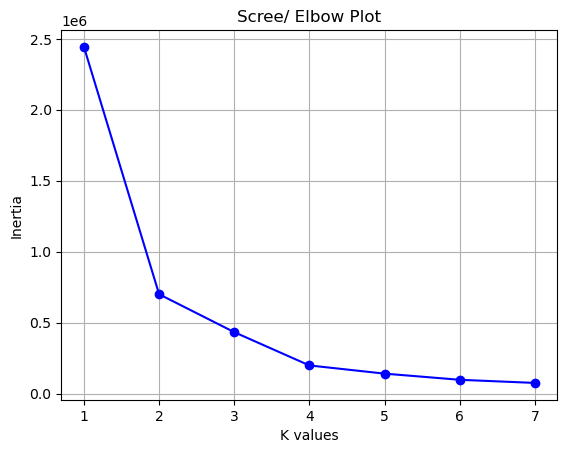

In [11]:
inertia = []
range_val = range(1,8)
for k in range_val:
    model = KMeans(n_clusters = k, init = 'k-means++',random_state = 30)
    model.fit(data)
    inertia.append(model.inertia_)
    
plt.plot(range_val, inertia, 'bo-')
plt.xlabel('K values')
plt.xticks(np.arange(1,8,1))
plt.ylabel('Inertia')
plt.title('Scree/ Elbow Plot')
plt.grid(True)
plt.show()

**Finding best no. of clusters from Hierarchical Clustering**

In [12]:
import scipy.cluster.hierarchy as shc

In [13]:
shc_data = data.iloc[:,1:4].values
shc_data

array([[8.2407600e+02, 3.3296000e+01, 1.3318400e+00],
       [9.3228800e+02, 1.3318400e+02, 1.5982080e+01],
       [1.0155280e+03, 7.2418800e+02, 3.0415896e+02],
       [8.6569600e+02, 4.5782000e+02, 1.5565880e+02],
       [7.2418800e+02, 9.9888000e+01, 1.1986560e+01],
       [5.5770800e+02, 7.9910400e+02, 4.7147136e+02],
       [6.4927200e+02, 2.0810000e+02, 4.9944000e+01],
       [6.9921600e+02, 2.4972000e+01, 9.9888000e-01],
       [6.4927200e+02, 2.4972000e+01, 9.9888000e-01],
       [6.1597600e+02, 6.9089200e+02, 3.6617276e+02],
       [1.0488240e+03, 7.4916000e+01, 5.2441200e+00],
       [8.6569600e+02, 5.8268000e+01, 3.4960800e+00],
       [7.1586400e+02, 6.6592000e+01, 5.3273600e+00],
       [7.9078000e+02, 3.3296000e+01, 1.3318400e+00],
       [7.1586400e+02, 1.3318400e+02, 2.1309440e+01],
       [9.9055600e+02, 6.6592000e+01, 3.9955200e+00],
       [1.1403880e+03, 4.1620000e+01, 1.2486000e+00],
       [4.1620000e+02, 6.8256800e+02, 4.2319216e+02]])

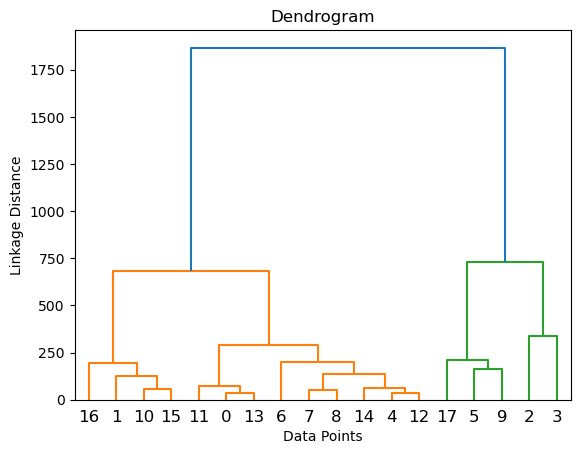

In [14]:
# Perform hierarchical clustering
dendrogram = shc.dendrogram(shc.linkage(shc_data, method = 'ward'))

# Visualize the dendrogram
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Linkage Distance')

plt.show()

**We find 3 optimum clusters**

## Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
data_scaled = scaler.fit_transform(data)
df4 = pd.DataFrame(data_scaled, columns = data.columns)
df4.head()

,job,avg_base_pay,avg_hourly_pay,tip_per_hr
0,-1.638356,0.187302,-0.754674,-0.627852
1,-1.445608,0.779579,-0.393233,-0.536874
2,-1.252861,1.235178,1.745287,1.252688
3,-1.060113,0.415101,0.781447,0.330510
4,-0.867365,-0.359417,-0.513713,-0.561686


In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [18]:
df5 = pca.fit_transform(df4)
df5.shape

(18, 2)

In [19]:
model = KMeans(3)
model.fit_predict(df5)

array([1, 1, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2], dtype=int32)

In [20]:
pca_df = pd.DataFrame(data = df5, columns = ['PCA1', 'PCA2'])
pca_df.head()

,PCA1,PCA2
0,-0.836888,-1.552467
1,-0.819547,-1.570221
2,1.468036,-1.691386
3,0.605364,-1.200808
4,-0.465834,-0.687411


In [21]:
pca_df_model = pd.concat([pca_df, pd.DataFrame({'cluster': model.labels_})], axis = 1)
pca_df_model

,PCA1,PCA2,cluster
0,-0.836888,-1.552467,1
1,-0.819547,-1.570221,1
2,1.468036,-1.691386,1
3,0.605364,-1.200808,1
4,-0.465834,-0.687411,1
5,3.339710,-0.438411,2
6,0.079309,-0.239680,1
7,-0.679198,0.112922,0
8,-0.576325,0.373392,0
9,2.463395,0.415207,2


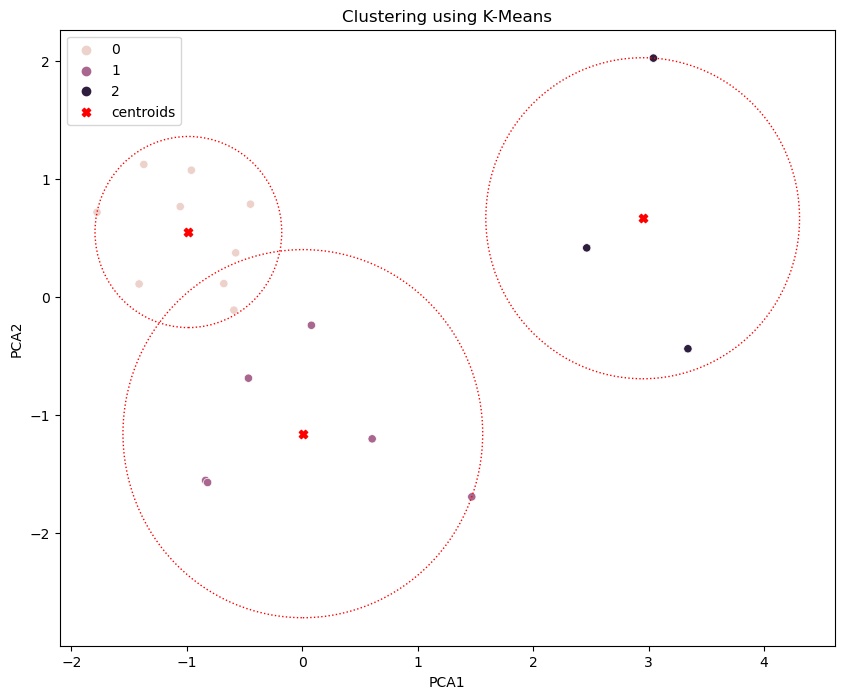

In [22]:
#plotting the three clusters
plt.figure(figsize = (10, 8))

sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'cluster', data = pca_df_model)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker = 'X', c = 'r', label = 'centroids')

# Draw circles around the clusters
for i, center in enumerate(model.cluster_centers_):
    cluster_points = pca_df_model[pca_df_model['cluster'] == i]
    distances = np.linalg.norm(cluster_points[['PCA1', 'PCA2']].values - center, axis=1)
    max_distance = max(distances)
    
    circle = plt.Circle((center[0], center[1]), max_distance, fill=False, edgecolor='r', linestyle='dotted')
    plt.gca().add_patch(circle)

plt.title('Clustering using K-Means')
plt.legend()
plt.show()

**Let's look at the silhouette score**

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
# Get cluster labels for each data point
labels = model.labels_

# Compute the silhouette score
silhouette_avg = silhouette_score(df5, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.47374055752040956


In [25]:
## Creating a target column 'Cluster' for storing clustered segments onto our original data.
new_df = pd.concat([df, pd.DataFrame({'Cluster': model.labels_})], axis = 1)
new_df

,job,avg_base_pay,avg_hourly_pay,tip_per_hr,Cluster
0,"Asst. Manager, Fast Food",824.076,33.296,1.33184,1
1,Asst. Restaurant Manager,932.288,133.184,15.98208,1
2,Banquet Captain,1015.528,724.188,304.15896,1
3,Bar Manager,865.696,457.820,155.65880,1
4,Barista,724.188,99.888,11.98656,1
5,Bartender,557.708,799.104,471.47136,2
6,Busser,649.272,208.100,49.94400,1
7,Dishwasher,699.216,24.972,0.99888,0
8,Fast Food,649.272,24.972,0.99888,0
9,Food Server,615.976,690.892,366.17276,2


<Axes: xlabel='Cluster', ylabel='count'>

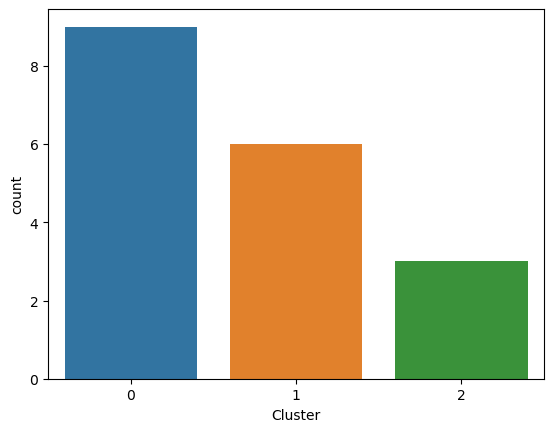

In [26]:
sns.countplot(x = new_df['Cluster'], data = new_df)

In [27]:
c0 = new_df[new_df['Cluster'] == 0]
c1 = new_df[new_df['Cluster'] == 1]
c2 = new_df[new_df['Cluster'] == 2]

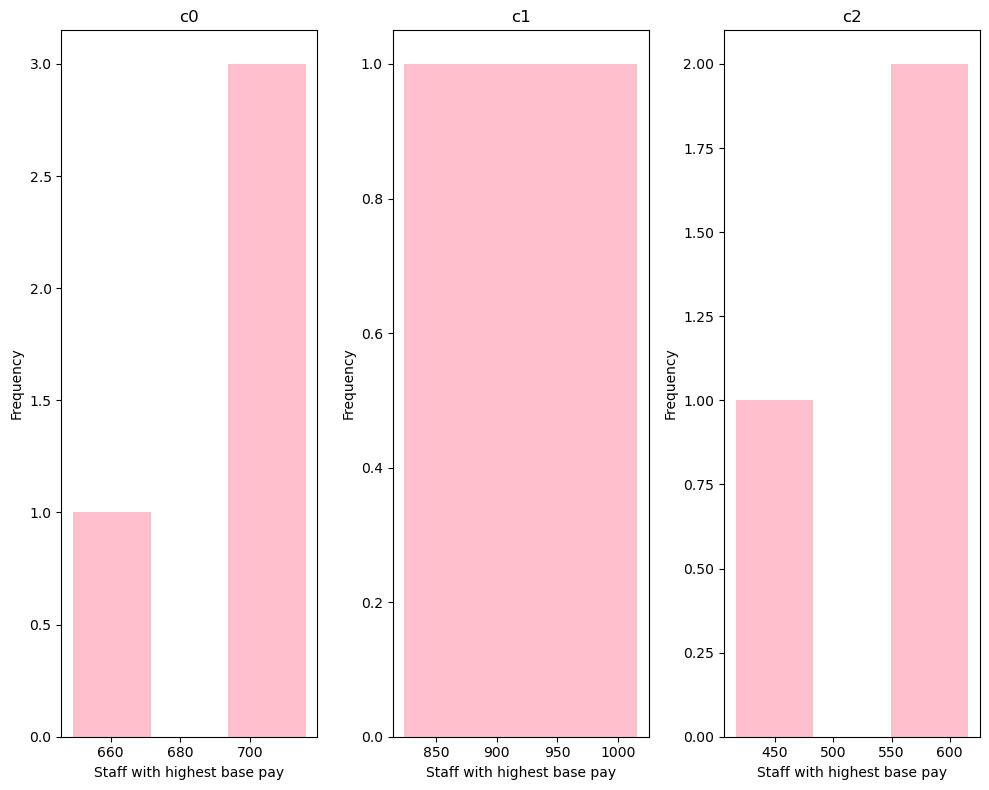

In [28]:
# List of your datasets
datasets = [c0, c1, c2]

# Create subplots to display histograms
fig, axs = plt.subplots(1, 3, figsize=(10, 8))

# Iterate through datasets and create histograms for the top 3 base pay
for i, dataset in enumerate(datasets):
    ax = axs[i]
    
    top_base_pay = dataset['avg_base_pay'].value_counts().head(3)
    
    # Create a histogram
    ax.hist(top_base_pay.index, bins = 3, weights = top_base_pay.values, color = 'pink')
    
    # Set labels and titles
    ax.set_xlabel('Staff with highest base pay')
    ax.set_ylabel('Frequency')
    ax.set_title(f'c{i}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

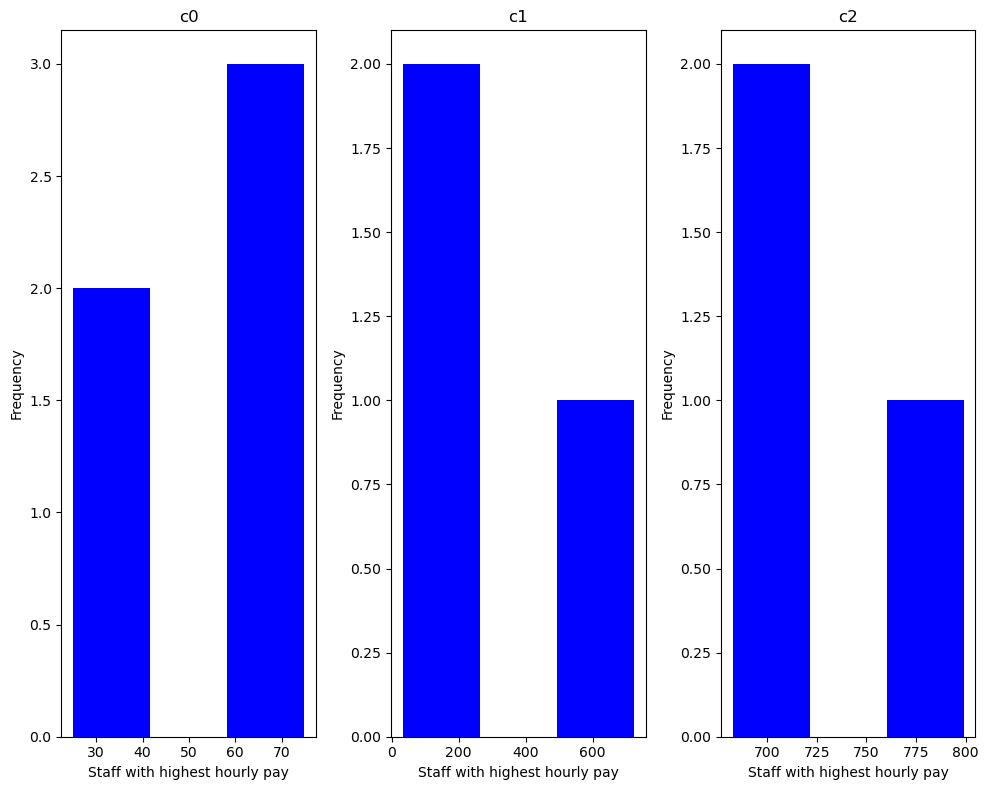

In [29]:
f, axs = plt.subplots(1, 3, figsize = (10, 8))

for i, dataset in enumerate(datasets):
    ax = axs[i]
    
    top_hourly_pay = dataset['avg_hourly_pay'].value_counts().head(3)
    
    ax.hist(top_hourly_pay.index, weights = top_hourly_pay.values, bins = 3, color = 'blue')
    
    ax.set_xlabel('Staff with highest hourly pay')
    ax.set_ylabel('Frequency')
    ax.set_title(f'c{i}')
    
plt.tight_layout()
    
plt.show()

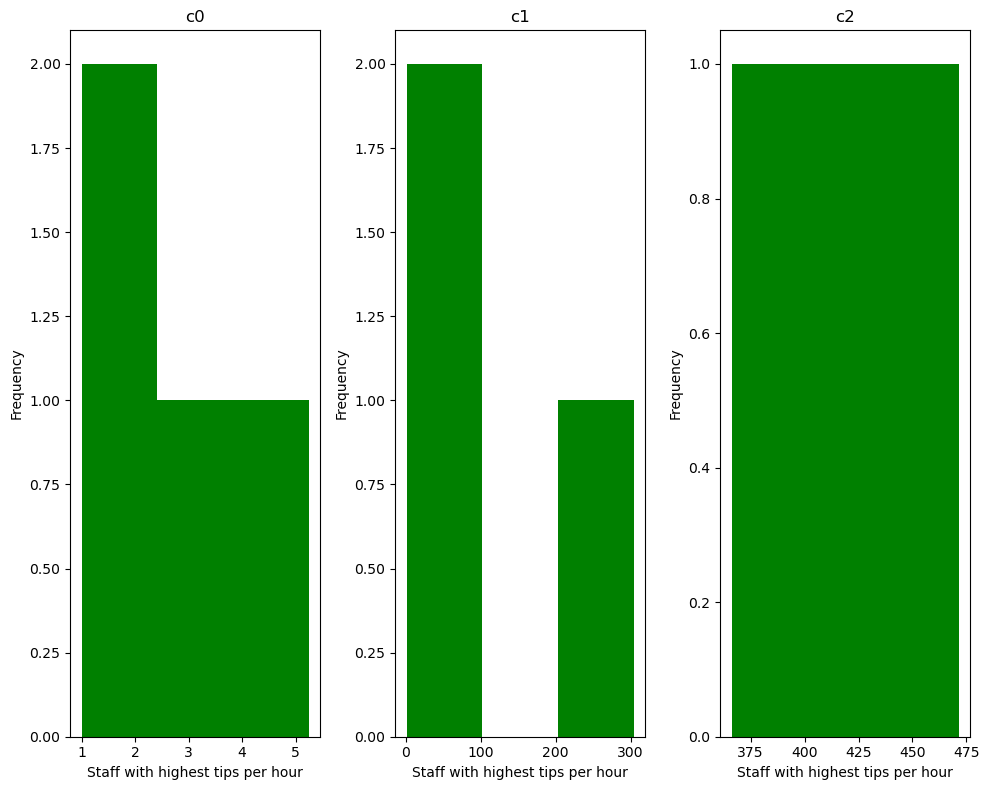

In [30]:
f, axs = plt.subplots(1, 3, figsize = (10, 8))

for i, dataset in enumerate(datasets):
    ax = axs[i]
    
    top_tips = dataset['tip_per_hr'].value_counts().head(3)
    
    ax.hist(top_tips.index, weights = top_tips.values, bins = 3, color = 'green')
    
    ax.set_xlabel('Staff with highest tips per hour')
    ax.set_ylabel('Frequency')
    ax.set_title(f'c{i}')
    
plt.tight_layout()
    
plt.show()

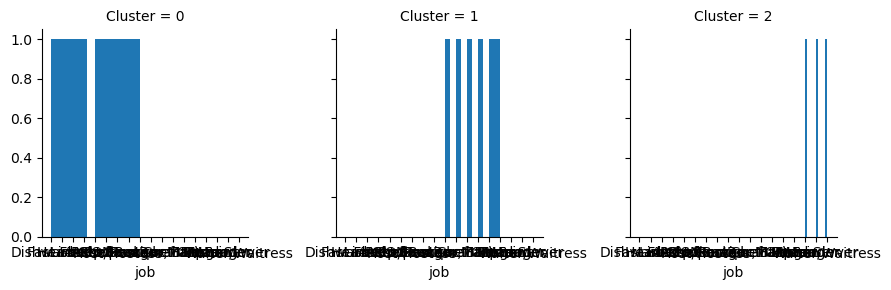

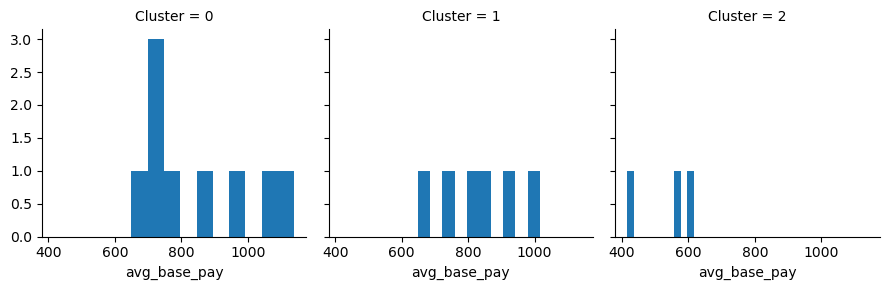

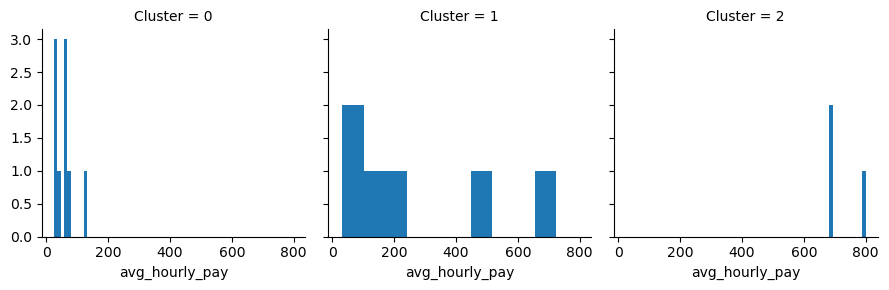

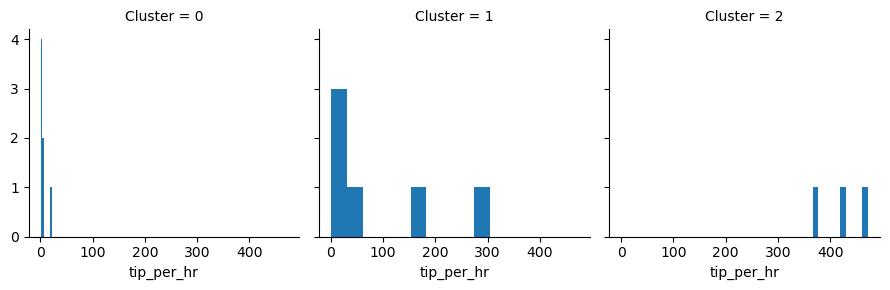

In [31]:
c_drop_df = new_df.drop(['Cluster'], axis = 1)

for c in c_drop_df:
    grid = sns.FacetGrid(new_df, col = 'Cluster')
    grid = grid.map(plt.hist, c)
    
plt.show()

## Grouping each staff member as front-of-the-house or back-of-the-house and visualizing the data for better understanding of the pay

In [32]:
df

,job,avg_base_pay,avg_hourly_pay,tip_per_hr
0,"Asst. Manager, Fast Food",824.076,33.296,1.33184
1,Asst. Restaurant Manager,932.288,133.184,15.98208
2,Banquet Captain,1015.528,724.188,304.15896
3,Bar Manager,865.696,457.820,155.65880
4,Barista,724.188,99.888,11.98656
5,Bartender,557.708,799.104,471.47136
6,Busser,649.272,208.100,49.94400
7,Dishwasher,699.216,24.972,0.99888
8,Fast Food,649.272,24.972,0.99888
9,Food Server,615.976,690.892,366.17276


In [33]:
df['job'].values

array(['Asst. Manager, Fast Food', 'Asst. Restaurant\xa0Manager',
       'Banquet Captain', 'Bar Manager', 'Barista', 'Bartender', 'Busser',
       'Dishwasher', 'Fast Food\xa0', 'Food Server', 'Head Chef',
       'Line Cook', 'Chef', 'Prep Cook', 'Host/Hostess', 'Supervisor',
       'Sous Chef', 'Waiter/Waitress'], dtype=object)

In [34]:
# Define a mapping of job titles to categories
job_title_to_category = {
    'Asst. Manager, Fast Food': 'Front of the House',
    'Asst. Restaurant Manager': 'Front of the House',
    'Banquet Captain': 'Front of the House',
    'Bar Manager': 'Front of the House',
    'Barista': 'Front of the House',
    'Bartender': 'Front of the House',
    'Busser': 'Front of the House',
    'Dishwasher': 'Back of the House',
    'Fast Food': 'Front of the House',
    'Food Server': 'Front of the House',
    'Head Chef': 'Back of the House',
    'Line Cook': 'Back of the House',
    'Chef': 'Back of the House',
    'Prep Cook': 'Back of the House',
    'Host/Hostess': 'Front of the House',
    'Supervisor': 'Front of the House',
    'Sous Chef': 'Back of the House',
    'Waiter/Waitress': 'Front of the House'
}

# Create a new 'Category' column based on the mapping
df['Category'] = df['job'].map(job_title_to_category)
df

,job,avg_base_pay,avg_hourly_pay,tip_per_hr,Category
0,"Asst. Manager, Fast Food",824.076,33.296,1.33184,Front of the House
1,Asst. Restaurant Manager,932.288,133.184,15.98208,NaN
2,Banquet Captain,1015.528,724.188,304.15896,Front of the House
3,Bar Manager,865.696,457.820,155.65880,Front of the House
4,Barista,724.188,99.888,11.98656,Front of the House
5,Bartender,557.708,799.104,471.47136,Front of the House
6,Busser,649.272,208.100,49.94400,Front of the House
7,Dishwasher,699.216,24.972,0.99888,Back of the House
8,Fast Food,649.272,24.972,0.99888,NaN
9,Food Server,615.976,690.892,366.17276,Front of the House


In [35]:
df['Category'] = df['Category'].fillna('Front of the House')
df

,job,avg_base_pay,avg_hourly_pay,tip_per_hr,Category
0,"Asst. Manager, Fast Food",824.076,33.296,1.33184,Front of the House
1,Asst. Restaurant Manager,932.288,133.184,15.98208,Front of the House
2,Banquet Captain,1015.528,724.188,304.15896,Front of the House
3,Bar Manager,865.696,457.820,155.65880,Front of the House
4,Barista,724.188,99.888,11.98656,Front of the House
5,Bartender,557.708,799.104,471.47136,Front of the House
6,Busser,649.272,208.100,49.94400,Front of the House
7,Dishwasher,699.216,24.972,0.99888,Back of the House
8,Fast Food,649.272,24.972,0.99888,Front of the House
9,Food Server,615.976,690.892,366.17276,Front of the House


<Axes: xlabel='Category', ylabel='count'>

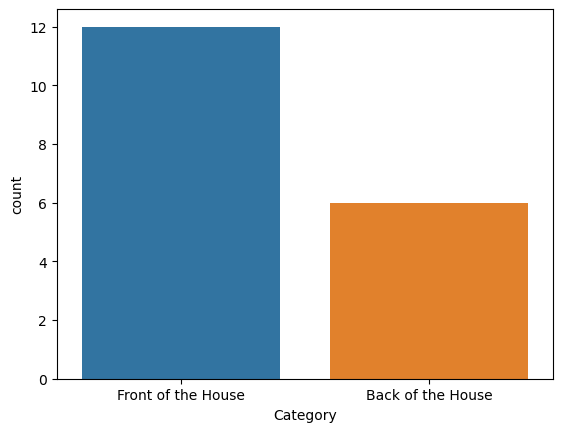

In [36]:
sns.countplot(x = 'Category', data = df)

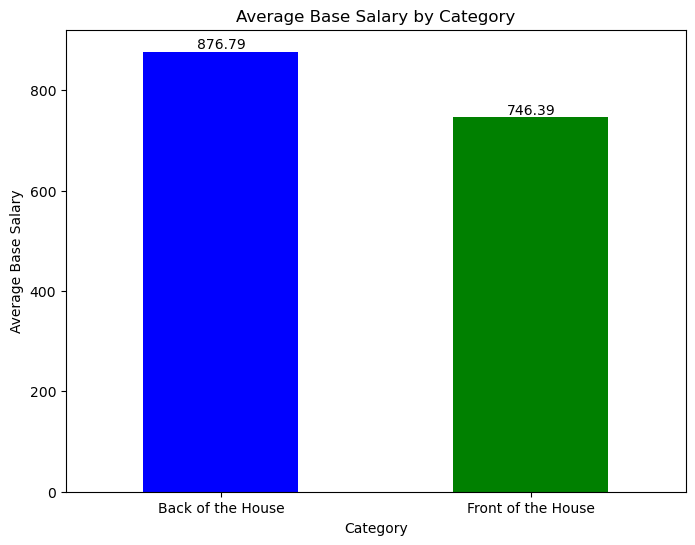

In [37]:
# Group the data by 'Category' and calculate the mean base salary for each category
base_pay_grouped = df.groupby('Category')['avg_base_pay'].mean()

# Create a bar chart
plt.figure(figsize=(8, 6))
base_pay_grouped.plot(kind='bar', color=['blue', 'green'])
plt.title('Average Base Salary by Category')
plt.xlabel('Category')
plt.ylabel('Average Base Salary')
plt.xticks(rotation=0)
# Display values above the bars
for index, value in enumerate(base_pay_grouped):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

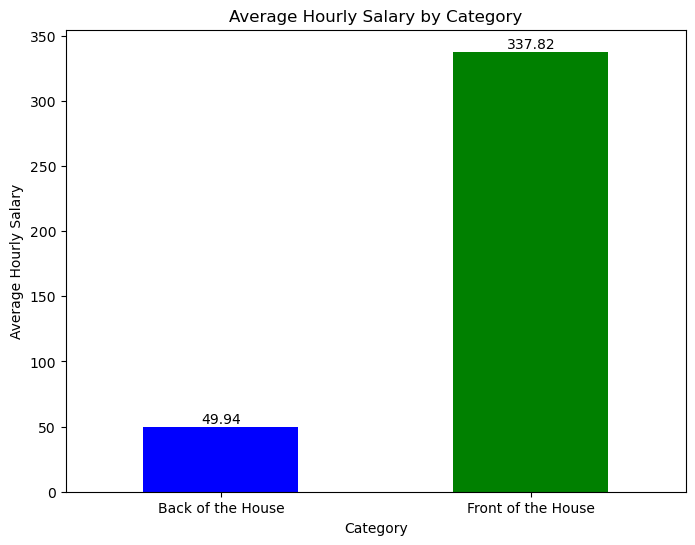

In [38]:
# Group the data by 'Category' and calculate the mean base salary for each category
hourly_pay_grouped = df.groupby('Category')['avg_hourly_pay'].mean()

# Create a bar chart
plt.figure(figsize=(8, 6))
hourly_pay_grouped.plot(kind='bar', color=['blue', 'green'])
plt.title('Average Hourly Salary by Category')
plt.xlabel('Category')
plt.ylabel('Average Hourly Salary')
plt.xticks(rotation=0)

# Display values above the bars
for index, value in enumerate(hourly_pay_grouped):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
    
plt.show()

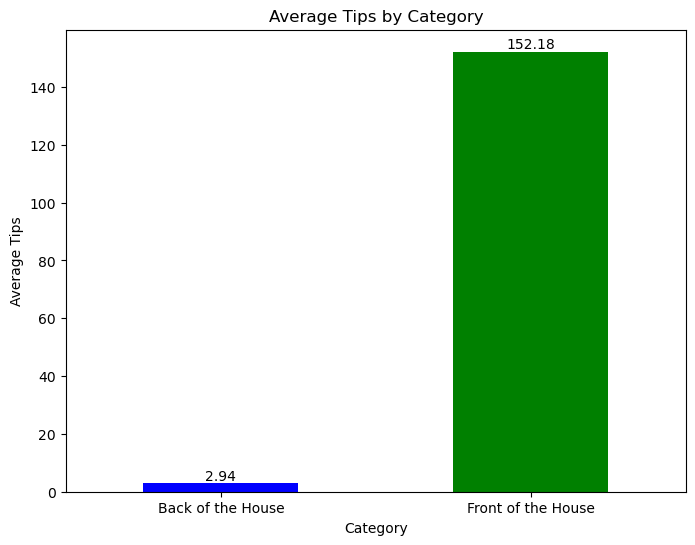

In [39]:
# Group the data by 'Category' and calculate the mean base salary for each category
tips_grouped = df.groupby('Category')['tip_per_hr'].mean()

# Create a bar chart
plt.figure(figsize=(8, 6))
tips_grouped.plot(kind='bar', color=['blue', 'green'])
plt.title('Average Tips by Category')
plt.xlabel('Category')
plt.ylabel('Average Tips')
plt.xticks(rotation=0)

# Display values above the bars
for index, value in enumerate(tips_grouped):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

In [40]:
a = np.sum(df1['avg_base_pay'])

In [41]:
a

14217.392

In [42]:
b = np.sum(df1['avg_hourly_pay'])
b

4353.451999999999